In [35]:
#Question 1 to 3
#A1 Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
#and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
#activities.

#A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
#available with the vendor.

#A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
#as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
#purchase behavior.
import pandas as pd
import numpy as np
 
xls = pd.read_excel("Lab Session Data.xlsx")
xls
data = xls.dropna(how= "any", axis=1)
data.drop(["Customer"], axis = 1, inplace = True)
A = data.iloc[:, :-1].to_numpy()
C = data.iloc[:, -1].to_numpy()
C = C.reshape(-1,1)
print("Dimensionality of matrix A:", A.shape)
print("No. of vectors in vector space ",A.shape[0])
print(A)
print(C)
l = len(C)
k = 0
for i in range(l):
    if C[i] > 200:
        print("Customer no. C",k,"is rich")
        k = k + 1
    else:
        print("Customer no. C",k,"is poor")
        k = k + 1
D = np.linalg.pinv(A)
result = np.dot(D, C)
print("The X vector is: ")
print(result)
rank = np.linalg.matrix_rank(A)
print("Rank of the given Matrix is : ",rank)

Dimensionality of matrix A: (10, 3)
No. of vectors in vector space  10
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Customer no. C 0 is rich
Customer no. C 1 is rich
Customer no. C 2 is rich
Customer no. C 3 is poor
Customer no. C 4 is rich
Customer no. C 5 is poor
Customer no. C 6 is rich
Customer no. C 7 is rich
Customer no. C 8 is poor
Customer no. C 9 is poor
The X vector is: 
[[ 1.]
 [55.]
 [18.]]
Rank of the given Matrix is :  3


C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\2076526813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["Customer"], axis = 1, inplace = True)


The mean of price is  1560.663453815261
The variance in price is  58732.365352539186
The mean price on wednesdays is  1550.706
The difference between the mean price usually and mean price wednesday's is  9.957453815261033
The mean price in april is  1698.9526315789474
The difference between the mean price usually and mean price in april is  -138.28917776368644
Probability of making a profit on Wednesday 0.42
The probability of profit given it is wedneday is  0.08433734939759036


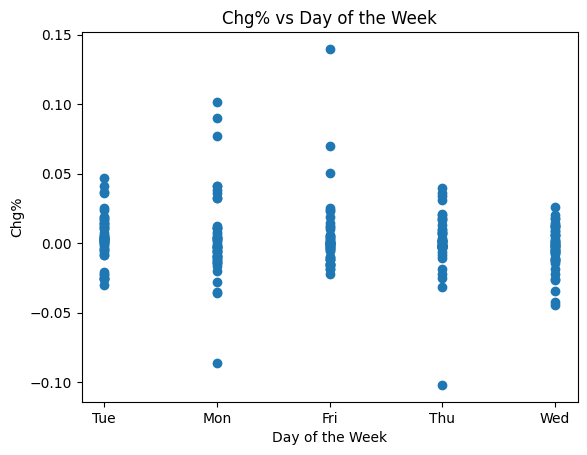

In [36]:
#Question 4
#A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
#following after loading the data to your programming platform.
import statistics
import pandas as pd
import matplotlib.pyplot as plot

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='IRCTC Stock Price')

pricedata=data['Price']
daily_mean=statistics.mean(pricedata)
print("The mean of price is ",daily_mean)
print("The variance in price is ",statistics.variance(pricedata))

wed_data=data[data['Day']=='Wed']
mean_wed=statistics.mean(wed_data['Price'])
print("The mean price on wednesdays is ",mean_wed)
print("The difference between the mean price usually and mean price wednesday's is ",daily_mean-mean_wed)

apr_data = data[data['Month']=='Apr']
mean_apr=statistics.mean(apr_data['Price'])
print("The mean price in april is ",mean_apr)
print("The difference between the mean price usually and mean price in april is ",daily_mean-mean_apr)

"""chgdata=data['Chg%']
prob_loss = len(chgdata[chgdata < 0]) / len(chgdata)
print("The probability of loss is ",prob_loss)"""

prob_profit_wednesday = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)
print("Probability of making a profit on Wednesday", prob_profit_wednesday)

inv_denom=(len(wed_data) / len(data))
conditional_prob = prob_profit_wednesday *inv_denom
print("The probability of profit given it is wedneday is ",conditional_prob)


plot.scatter(data['Day'], data['Chg%'])
plot.xlabel('Day of the Week')
plot.ylabel('Chg%')
plot.title('Chg% vs Day of the Week')
plot.show()

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

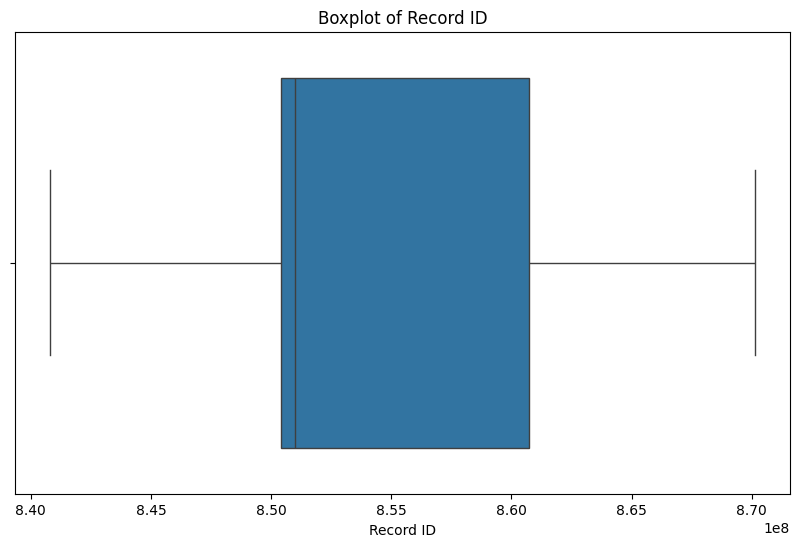

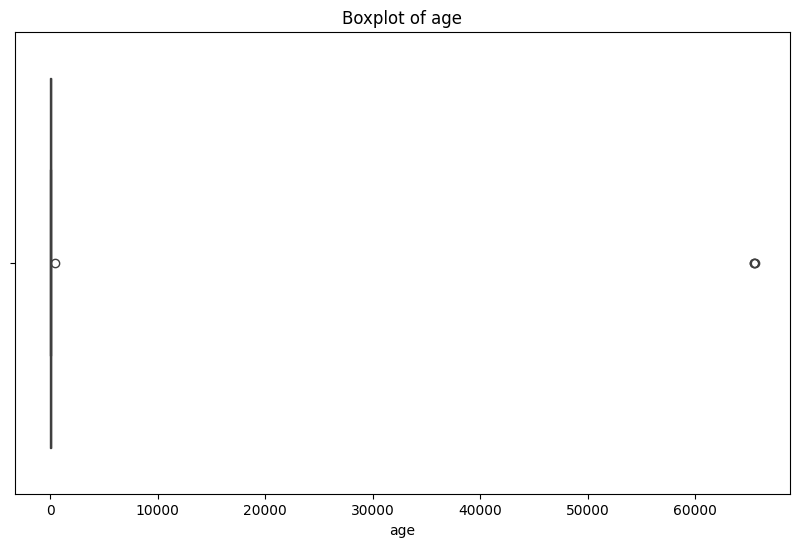

         Record ID          age
mean  8.529473e+08    73.555822
std   7.581969e+06  1183.976718


In [7]:
#Question 5
#A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
#following tasks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
file_path = 'Lab Session Data.xlsx'
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Identify attribute types
print(thyroid_data.dtypes)

# Encoding categorical attributes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming ordinal_cols and nominal_cols have been identified
ordinal_cols = []  # Update with actual ordinal columns
nominal_cols = thyroid_data.select_dtypes(include=['object']).columns

# Label Encoding for ordinal variables
label_encoders = {col: LabelEncoder().fit(thyroid_data[col]) for col in ordinal_cols}
for col, le in label_encoders.items():
    thyroid_data[col] = le.transform(thyroid_data[col])

# One-Hot Encoding for nominal variables
thyroid_data = pd.get_dummies(thyroid_data, columns=nominal_cols, drop_first=True)

# Data range for numeric variables
print(thyroid_data.describe())

# Missing values
print(thyroid_data.isnull().sum())

# Outliers
for col in thyroid_data.select_dtypes(include=[np.number]):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=thyroid_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Mean and variance for numeric variables
mean_variance = thyroid_data.select_dtypes(include=[np.number]).agg(['mean', 'std'])
print(mean_variance)


In [28]:
from scipy.stats import zscore

for col in numeric_cols:
    thyroid_data[col] = pd.to_numeric(df[col], errors='coerce')  

# Impute missing numeric values using mean or median based on presence of outliers
for col in numeric_cols:
    if thyroid_data[col].isnull().sum() > 0:
        if np.abs(zscore(thyroid_data[col].dropna())).max() > 3: 
            median_value = thyroid_data[col].median()
            thyroid_data[col].fillna(median_value, inplace=True)
        else:
            mean_value = thyroid_data[col].mean()
            thyroid_data[col].fillna(mean_value, inplace=True)

print("DataFrame after handling missing numeric values:")
print(thyroid_data)

DataFrame after handling missing numeric values:
      Record ID  age  sex_F  sex_M  on thyroxine_t  query on thyroxine_t  \
0     840801013   29   True  False           False                 False   
1     840801014   29   True  False           False                 False   
2     840801042   41   True  False           False                 False   
3     840803046   36   True  False           False                 False   
4     840803047   32   True  False           False                 False   
...         ...  ...    ...    ...             ...                   ...   
9167  870119022   56  False   True           False                 False   
9168  870119023   22  False   True           False                 False   
9169  870119025   69  False   True           False                 False   
9170  870119027   47   True  False           False                 False   
9171  870119035   31  False   True           False                 False   

      on antithyroid medication_t  sic

C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\4006151969.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  thyroid_data[col].fillna(median_value, inplace=True)
C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\4006151969.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [34]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the data
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI')

# Identify attributes that need normalization
# For demonstration, let's assume all numeric columns need normalization

# Separating numeric and categorical data
numeric_cols =  ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
categorical_cols =['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                    'TBG measured', 'referral source', 'Condition']

label_encoder = LabelEncoder()

for col in categorical_cols:
    
    if df[col].dtype == 'object':
        df[col].replace('?', np.nan, inplace=True)
        df[col] = df[col].astype(str)  
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[[col]] = imputer.fit_transform(df[[col]])  
        df[col] = label_encoder.fit_transform(df[col])
    else:
        df[col] = label_encoder.fit_transform(df[col])

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        if np.abs(zscore(df[col].dropna())).max() > 3: 
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
        else:
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
print("DataFrame after handling missing values and converting to numeric:")
print(df)
print("Data range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

print("Presence of missing values in each attribute:")
print(df.isnull().sum())
print("Presence of outliers in numeric variables (using z-score method):")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:  
        z_scores = np.abs(zscore(df[col].dropna()))
        outliers = np.where(z_scores > 3)[0]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers found")
        else:
            print(f"{col}: No outliers found")
    else:
        print(f"{col}: Not numeric type, skipping z-score calculation")

print()

# Calculate mean and variance for numeric variables
print("Mean and variance (or standard deviation) for numeric variables:")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:  
        mean = df[col].mean()
        
        variance = df[col].var()
        print(f"{col}: Mean = {mean}, Variance = {variance}")
    else:
        print(f"{col}: Not numeric type, skipping mean and variance calculation")

DataFrame after handling missing values and converting to numeric:
      Record ID  age  sex  on thyroxine  query on thyroxine  \
0     840801013   29    0             0                   0   
1     840801014   29    0             0                   0   
2     840801042   41    0             0                   0   
3     840803046   36    0             0                   0   
4     840803047   32    0             0                   0   
...         ...  ...  ...           ...                 ...   
9167  870119022   56    1             0                   0   
9168  870119023   22    1             0                   0   
9169  870119025   69    1             0                   0   
9170  870119027   47    0             0                   0   
9171  870119035   31    1             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0   
1                             0     0   

C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\2379086626.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('?', np.nan, inplace=True)
C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\2379086626.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [32]:
#A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data
#variables. Employ following guidance.
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

# Impute missing numeric values using mean or median based on presence of outliers
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        if np.abs(zscore(df[col].dropna())).max() > 3: 
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
        else:
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)

print("DataFrame after handling missing numeric values:")
print(df)

DataFrame after handling missing numeric values:
      Record ID       age  sex  on thyroxine  query on thyroxine  \
0     840801013  0.000427    0             0                   0   
1     840801014  0.000427    0             0                   0   
2     840801042  0.000610    0             0                   0   
3     840803046  0.000534    0             0                   0   
4     840803047  0.000473    0             0                   0   
...         ...       ...  ...           ...                 ...   
9167  870119022  0.000839    1             0                   0   
9168  870119023  0.000320    1             0                   0   
9169  870119025  0.001038    1             0                   0   
9170  870119027  0.000702    0             0                   0   
9171  870119035  0.000458    1             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0  

C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\658913345.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\sridh\AppData\Local\Temp\ipykernel_1040\658913345.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [37]:
# Convert categorical variables to binary format
df_binary = pd.get_dummies(df, drop_first=True)
#Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
#attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
#the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
#Use first vector for each document for this. Compare the values for JC and SMC and judge the
#appropriateness of each of them.
# Take first 2 observation vectors
vector1 = df_binary.iloc[0]
vector2 = df_binary.iloc[1]

# Calculate f11, f10, f01, and f00
f11 = sum((vector1 == 1) & (vector2 == 1))
f10 = sum((vector1 == 1) & (vector2 == 0))
f01 = sum((vector1 == 0) & (vector2 == 1))
f00 = sum((vector1 == 0) & (vector2 == 0))

# Calculate JC and SMC
jc = f11 / (f11 + f10 + f01)
smc = (f11 + f00) / (f11 + f10 + f01 + f00)

print(f"Jaccard Coefficient: {jc}")
print(f"Simple Matching Coefficient: {smc}")

Jaccard Coefficient: 0.25
Simple Matching Coefficient: 0.8571428571428571


In [38]:
#Cosine Similarity Measure: Now take the complete vectors for these two observations (including
#all the attributes). Calculate the Cosine similarity between the documents by using the second
#feature vector for each document.
from sklearn.metrics.pairwise import cosine_similarity


vector1 = df.loc[0, df.columns != 'Record ID'].values.reshape(1, -1)
vector2 = df.loc[1, df.columns != 'Record ID'].values.reshape(1, -1)
cosine_sim = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity between the two documents: {cosine_sim[0][0]}")

Cosine Similarity between the two documents: 0.9945598949361839


In [30]:
from sklearn.preprocessing import MinMaxScaler
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Normalized DataFrame:")
print(df)

Normalized DataFrame:
      Record ID       age  sex  on thyroxine  query on thyroxine  \
0     840801013  0.000427    0             0                   0   
1     840801014  0.000427    0             0                   0   
2     840801042  0.000610    0             0                   0   
3     840803046  0.000534    0             0                   0   
4     840803047  0.000473    0             0                   0   
...         ...       ...  ...           ...                 ...   
9167  870119022  0.000839    1             0                   0   
9168  870119023  0.000320    1             0                   0   
9169  870119025  0.001038    1             0                   0   
9170  870119027  0.000702    0             0                   0   
9171  870119035  0.000458    1             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0   
1                        

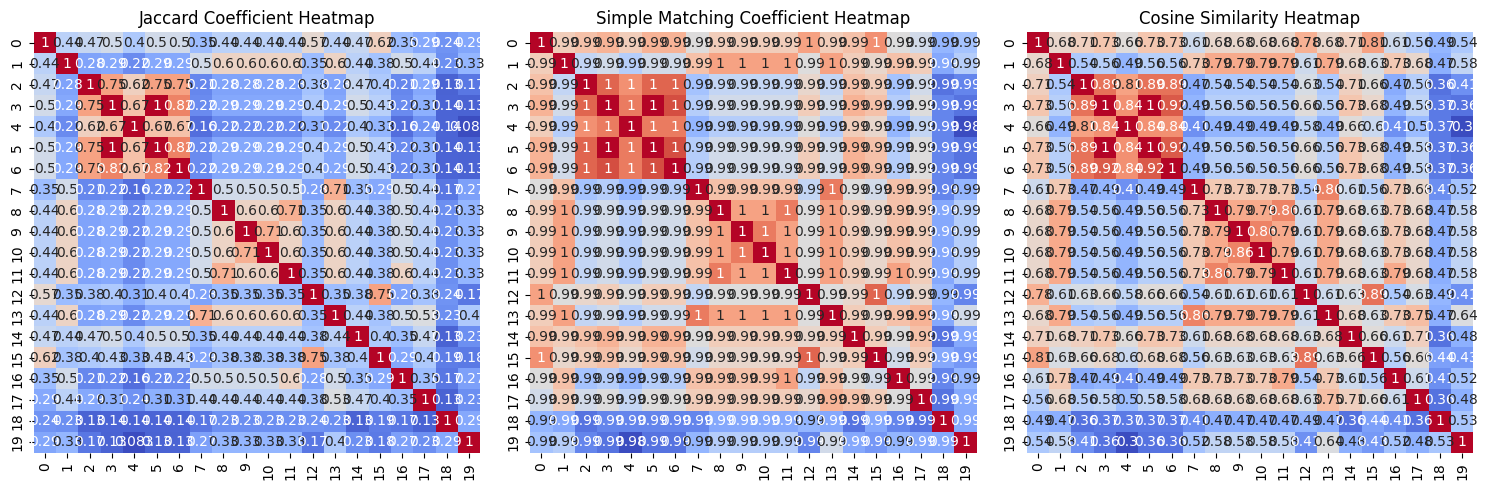

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI')

# Normalize numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Convert categorical variables to binary format
df_binary = pd.get_dummies(df, drop_first=True)

# Select first 20 observation vectors
df_20 = df_binary.iloc[:20]

# Initialize matrices to store similarity scores
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculate similarities
for i in range(20):
    for j in range(20):
        vec1 = df_20.iloc[i]
        vec2 = df_20.iloc[j]
        
        f11 = sum((vec1 == 1) & (vec2 == 1))
        f10 = sum((vec1 == 1) & (vec2 == 0))
        f01 = sum((vec1 == 0) & (vec2 == 1))
        f00 = sum((vec1 == 0) & (vec2 == 0))
        
        jc_matrix[i, j] = f11 / (f11 + f10 + f01)
        smc_matrix[i, j] = (f11 + f00) / (f11 + f10 + f01 + f00)
        cosine_matrix[i, j] = cosine_similarity([vec1], [vec2])[0][0]

# Plot heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()
